    id       price   price_m   total_square   living_square  ratio_livtot  \
0  1.0  13000000.0  361111.0            36.0           18.0        0.5000   
1  2.0  14500000.0  402778.0            36.0           36.0        1.0000   
2  3.0  39000000.0  386139.0           101.0           60.0        0.5941   
3  4.0  16000000.0  380952.0            42.0           20.0        0.4800   
4  5.0  12300000.0  323684.0            38.0           36.0        0.9500   

   rooms  level  total_levels  not_ground_floor  ...  concrete  \
0    1.0    3.0           5.0               1.0  ...       0.0   
1    1.0    1.0           9.0               0.0  ...       1.0   
2    3.0   11.0          14.0               1.0  ...       1.0   
3    1.0    7.0           9.0               1.0  ...       0.0   
4    1.0    1.0           5.0               0.0  ...       0.0   

   part_furniture  full_furniture    year  walls  condition  price_m_k  \
0             0.0             0.0  1991.0      k       good      3

C:\Users\Frome\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+16, tolerance: 4.911e+13
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Иерархическая кластеризация')

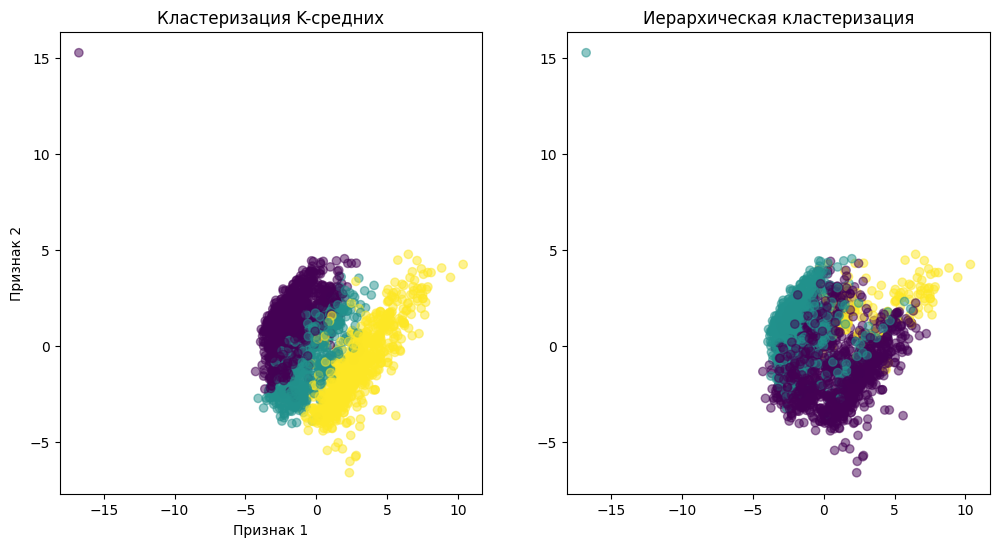

In [5]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

# 1. Загрузка данных
data = pd.read_csv('almaty-apts-2019-1-processed.csv')  # Замените на ваш файл

# 2. Исследование данных
print(data.head())
print(data.info())
print(data.describe())

# 3. Предварительная обработка данных
# Удаление дубликатов
data = data.drop_duplicates()

# Заполнение NaN средними значениями для числовых столбцов
numeric_imputer = SimpleImputer(strategy='mean')
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])

# Заполнение NaN наиболее частыми значениями для категориальных столбцов
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = data.select_dtypes(include=[object]).columns.tolist()
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])

# Кодирование категориальных переменных
data = pd.get_dummies(data, drop_first=True)

# 4. Выбор методов регрессии
# Мы будем использовать Linear Regression, Ridge и Lasso
models = {
    'Линейная регрессия': LinearRegression(),
    'Регрессия с регуляризацией': Ridge(),
    'Регрессия с Lasso': Lasso()
}

# 5. Выбор метрики оценки качества модели
# Мы будем использовать Среднюю абсолютную ошибку (MAE) и Среднеквадратичную ошибку (MSE)
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    return mae, mse

# 6. Обучение и тестирование моделей
X = data.drop(['id', 'price'], axis=1, errors='ignore')  # Удаляем 'id' и 'price'
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {}
for name, model in models.items():
    mae, mse = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {'MAE': mae, 'MSE': mse}

# 7. Оценка качества моделей
results_df = pd.DataFrame(results).T
print(results_df)

# 8. Кластеризация
# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Кластеризация с использованием K-средних
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Кластеризация с использованием иерархической кластеризации
agglo = AgglomerativeClustering(n_clusters=3)
clusters_agglo = agglo.fit_predict(X_scaled)

# Визуализация кластеров
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 6))

# График для K-средних
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, cmap='viridis', alpha=0.5)
plt.title('Кластеризация K-средних')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

# График для иерархической кластеризации
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_agglo, cmap='viridis', alpha=0.5)
plt.title('Иерархическая кластеризация')